In [150]:
"""
brownian() implements one dimensional Brownian motion (i.e. the Wiener process).
"""
%pylab inline
# File: brownian.py
from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian(x0, n, dt, delta, radius, out=None):
    """\
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))
    
    #print(len(r))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)
        
    #print("fweff")        
    #print(out)
    
    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples.
    outNew = np.copy(out)
    
    np.cumsum(r, axis=-1, out=outNew)
    
    #print("fkopktioje")
    #print(outNew)
    
    if((x0[0]+outNew[0][0])**2 + (x0[1]+outNew[1][0])**2 < radius):
        np.cumsum(r, axis=-1, out=out)
        out += np.expand_dims(x0, axis=-1)
        
        return True
    
    #print(out)

    return False

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Reaction at: 
11


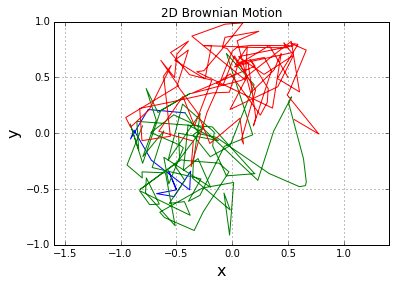

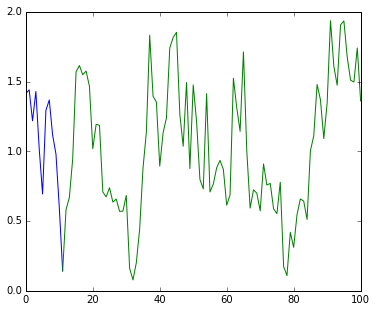

In [158]:
import numpy
from pylab import plot, show, grid, axis, xlabel, ylabel, title, xlim

def main():

    # The Wiener process parameter.
    delta = 0.25
    # Total time.
    T = 100.0
    # Number of steps.
    N = 100
    # Time step size
    dt = T/N
    # Initial values of x.
    x = numpy.empty((2,N+1))
    x[:, 0] = -0.5
    
    y = numpy.empty((2,N+1))
    y[:, 0] = 0.5
    
    z = numpy.empty((2,N+1))
    z[:, 0] = 0.0
    
    #brownian(x[:,0], N, dt, delta, out=x[:,1:])
    #brownian(y[:,0], N, dt, delta, out=y[:,1:])
    
    i = 0
    while(i!=N):
        if(brownian(x[:,i], 1, dt, delta, 1, out=x[:,i+1:]) and brownian(y[:,i], 1, dt, delta, 1, out=y[:,i+1:]) and brownian(z[:,i], 1, dt, delta, 1, out=z[:,i+1:])):
            i+=1


    # Plot the 2D trajectory.
    #plot(x[0],x[1],'b')
    
    for i in range(N):
        if((x[0][i]-y[0][i])**2 + (x[1][i]-y[1][i])**2 < 0.05):
            break
    
    print("Reaction at: ")
    print(i)
    
    plot(x[0][:i+1],x[1][:i+1],'b')
    plot(x[0][i:],x[1][i:],'g')
    
    plot(y[0],y[1],'r')
    #plot(z[0],z[1],'g')

    # Mark the start and end points.
    #plot(x[0,0],x[1,0], 'go')
    #plot(x[0,-1], x[1,-1], 'yo')

    #plot(y[0,0],y[1,0], 'go')
    #plot(y[0,-1], y[1,-1], 'yo')
    
    #plot(z[0,0],z[1,0], 'go')
    #plot(z[0,-1], z[1,-1], 'yo')

    # More plot decorations.
    title('2D Brownian Motion')
    xlabel('x', fontsize=16)
    ylabel('y', fontsize=16)
    axis('equal')
    grid(True)
    show()
    
    a = []
    b = []
    for j in range(N+1):
        a.append(j)
        b.append(numpy.sqrt((x[0][j]-y[0][j])**2 + (x[1][j]-y[1][j])**2))
    
    fig = plt.figure(figsize=(15,5))
    fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
    ax1 = fig.add_subplot(1,2,1)
    
    
    ax1.plot(a[:i+1], b[:i+1], 'b-')
    ax1.plot(a[i:], b[i:], 'g-')
    
    #plot(x[:i+1], numpy.sqrt((x[0][:i+1]-y[0][:i+1])**2 + (x[1][:i+1]-y[1][:i+1])**2), 'b-')
    #plot(x[i:], numpy.sqrt((x[0][i:]-y[0][i:])**2 + (x[1][i:]-y[1][i:])**2), 'g-')
    
    #ax1.plot(numpy.sqrt((x[0]-z[0])**2 + (x[1]-z[1])**2), 'g-')
    
    
if __name__ == "__main__":
    main()
    
